In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  

In [2]:
df_socialmedia_dataset_orginal = pd.read_csv('socialmedia_dataset_orginal.csv')

In [3]:
df_socialmedia_dataset_orginal.head (3)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0


In [4]:
socialmedia_clean = df_socialmedia_dataset_orginal.copy()

In [5]:
socialmedia_clean['Wellbeing_Score'] = (
    socialmedia_clean['Happiness_Index(1-10)'] +
    socialmedia_clean['Sleep_Quality(1-10)'] +
    socialmedia_clean['Exercise_Frequency(week)'] +
    (11 - socialmedia_clean['Stress_Level(1-10)'])
)

In [6]:
socialmedia_clean.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)', 'Wellbeing_Score'],
      dtype='object')

## Create new additional column Stress_Level_Binary where 0= low stress (1-5) 1= high stress (6-10)

In [7]:
#value is 1, otherwise 0, where 0= low stress (1-5) 1= high stress (6-10)
#code checks every single value within the selected column against the number 6.
#if the person's stress level in the original DataFrame was 6 or higher > True, otherwise > False
Stress_Level_Binary = socialmedia_clean['Stress_Level(1-10)'] >= 6

In [8]:
#converts a series of True/False values (Boolean values) into a new column containing only binary integers (1 and 0) corresponding to high and low values 
socialmedia_clean['Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))'] = np.where(Stress_Level_Binary, 1, 0)

In [9]:
#check DataFrame
socialmedia_clean.head (3)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),Wellbeing_Score,"Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))"
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0,27.0,1
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0,23.0,1
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0,19.0,1


In [10]:
#output all the column headers 
socialmedia_clean.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)', 'Wellbeing_Score',
       'Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))'],
      dtype='object')

## Create DataFrame for ML

In [11]:
#creates a new copy of the DataFrame and remove a specified column Stress_Level(1-10)
socialmedia_clean_ML = socialmedia_clean.drop(columns=['Stress_Level(1-10)'], inplace=False) 

In [12]:
#output all the column headers
socialmedia_clean_ML.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Days_Without_Social_Media',
       'Exercise_Frequency(week)', 'Social_Media_Platform',
       'Happiness_Index(1-10)', 'Wellbeing_Score',
       'Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))'],
      dtype='object')

## Create heatmap under H3. Correlation heatmap of the linear relationship between Stress and other numerical factors (like Screen Time, Sleep Quality, Exercise Frequency) 

In [13]:
#for hiphofize #3 calculates the pairwise correlation between each column in the selected subset
h3 = socialmedia_clean[['Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
    'Exercise_Frequency(week)', 'Happiness_Index(1-10)', 'Stress_Level(1-10)', 'Wellbeing_Score']].corr()

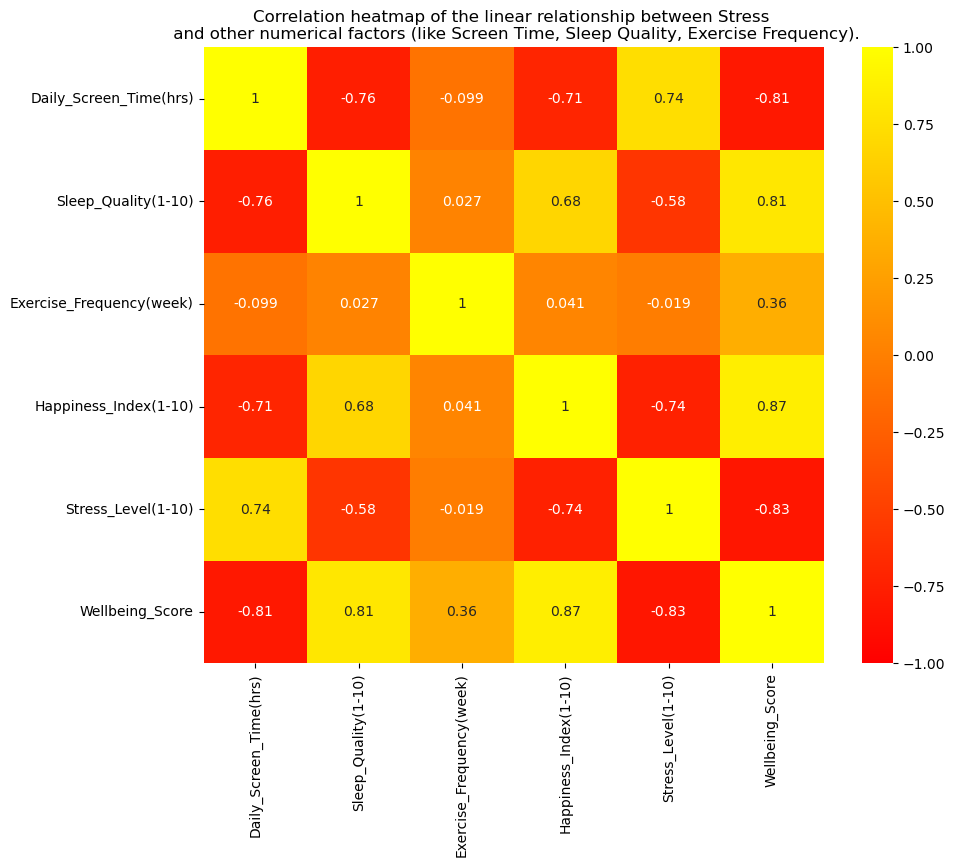

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(h3, annot=True, cmap='autumn', vmin=-1, vmax=1)
plt.title('Correlation heatmap of the linear relationship between Stress \n and other numerical factors (like Screen Time, Sleep Quality, Exercise Frequency).')
plt.savefig("heatmap.png")
plt.show()

## KEY OBSERVATIONS:
# ------------------
## Correlation heatmap of the linear relationship between Stress and other numerical factors (like Screen Time, Sleep Quality, Exercise Frequency) for instance, 
### - values within the cells range from -1 to +1
### 1. for a correlation coefficient of +1 (or very close to +1) indicates a perfect positive linear correlation
###    for instance,
###    seesaw - when your friend goes up on his side, you go down on your side
### 2. for a correlation coefficient -1 (or a value close to -1) indicates a perfect negative linear correlation
###    for instance,
###    the more a student spends using social media, the less their ability to concentrate and the worse their performance
### 3. when the correlation coefficient value is 0 (or very close to 0), it means that there is a weak or no linear relation between the two variables
###    for instance,
###    Your shoe size has no linear relationship to what grade you can get on a project defense
### -----------------
###    red or dark orange colors show us strong relationships (values closer to 1 or -1)
###    yellow or pale orange represent weak ties (values closer to 0)
### -----------------
## Negative correlation
### Relationships between Stress_Level and WellBeing_Score (-0.83): This is the strongest relationship in the graph. It shows that the higher a person's stress level, the lower their overall well-being score
### Daily_Screen_Time and Sleep_Quality (-0.76): a strong trend towards decreased sleep quality with increasing daily screen time.
### Daily_Screen_Time and Happiness_Index/Wellbeing_Score (-0.71 and -0.81): More screen time is associated with significantly lower indices of happiness and overall well-being
## positive correlation
### Happiness_Index and Wellbeing_Score (0.87): Very strong correlation. People with high happiness scores also have high well-being scores
### Sleep_Quality and Sleep_Quality (0.81): Higher sleep quality is strongly associated with higher well-being scores.
### Sleep_Quality and Happiness_Index (0.68): Good sleep is positively associated with feelings of happiness.
## Weak or no linear relation
### Exercise_Frequency and Stress_Level (-0.019): Interestingly, in this data set, there is almost no linear relationship between exercise frequency and stress level. They do not influence each other in a predictable way, making this chart seem like an excuse for lazy people
### Exercise_Frequency and Sleep_Quality (0.027): Similarly, there is a very weak relationship between these two variables
## The heatmap shows that sleep quality and daily screen time have the greatest impact on subjective measures of stress, happiness, and well-being
## these factors have significantly stronger correlations than any other modified models